In [45]:
%matplotlib inline

In [46]:
# uncomment and run the following line if using Google Colab
#from google.colab import drive
#drive.mount('/content/drive')

In [47]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Load Data

In [48]:
df = pd.read_excel(r'D:\Codings\DSM\Dataset\Online Retail.xlsx')

In [49]:
df.shape

(541909, 8)

In [50]:
df.head(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [52]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


# 2. Product Analytics

In [53]:
df= df[df['Quantity']>0]
df= df[df['UnitPrice']>0]
df=df[df['InvoiceDate']<'2011-12-01']

In [54]:
pd.DataFrame(df['Quantity'].describe())

,Quantity
count,504993.000000
mean,10.443963
std,111.109818
min,1.000000
25%,1.000000
50%,3.000000
75%,11.000000
max,74215.000000


In [55]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

#### - Time-series Repeat Customers

In [56]:
invoice_customer_df = df.groupby(
    by=['InvoiceNo', 'InvoiceDate']
).agg({
    'Sales': sum,
    'CustomerID': max,
    'Country': max,
}).reset_index()

C:\Users\navee\AppData\Local\Temp\ipykernel_11808\1545660781.py:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ).agg({
C:\Users\navee\AppData\Local\Temp\ipykernel_11808\1545660781.py:3: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  ).agg({


In [57]:
invoice_customer_df

,InvoiceNo,InvoiceDate,Sales,CustomerID,Country
0,536365,2010-12-01 08:26:00,139.12,17850.0,United Kingdom
1,536366,2010-12-01 08:28:00,22.20,17850.0,United Kingdom
2,536367,2010-12-01 08:34:00,278.73,13047.0,United Kingdom
3,536368,2010-12-01 08:34:00,70.05,13047.0,United Kingdom
4,536369,2010-12-01 08:35:00,17.85,13047.0,United Kingdom
...,...,...,...,...,...
19178,579870,2011-11-30 16:47:00,292.41,12437.0,France
19179,579872,2011-11-30 16:54:00,278.82,14085.0,United Kingdom
19180,579881,2011-11-30 17:22:00,905.52,12429.0,Denmark
19181,579885,2011-11-30 17:37:00,1075.36,15444.0,United Kingdom


In [58]:
monthly_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
   pd.Grouper(freq='ME'), 'CustomerID']).filter(lambda x: len(x) > 1)['CustomerID'].resample('ME').nunique()

In [59]:
monthly_repeat_customers_df

InvoiceDate
2010-12-31    263
2011-01-31    153
2011-02-28    152
2011-03-31    203
2011-04-30    170
2011-05-31    281
2011-06-30    220
2011-07-31    227
2011-08-31    198
2011-09-30    272
2011-10-31    324
2011-11-30    541
Freq: ME, Name: CustomerID, dtype: int64

In [60]:
monthly_unique_customers_df = df.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()

C:\Users\navee\AppData\Local\Temp\ipykernel_11808\1628018389.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_unique_customers_df = df.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()


In [61]:
monthly_unique_customers_df

InvoiceDate
2010-12-31     885
2011-01-31     741
2011-02-28     758
2011-03-31     974
2011-04-30     856
2011-05-31    1056
2011-06-30     991
2011-07-31     949
2011-08-31     935
2011-09-30    1266
2011-10-31    1364
2011-11-30    1664
Freq: ME, Name: CustomerID, dtype: int64

In [62]:
monthly_repeat_percentage = monthly_repeat_customers_df/monthly_unique_customers_df*100.0
monthly_repeat_percentage

InvoiceDate
2010-12-31    29.717514
2011-01-31    20.647773
2011-02-28    20.052770
2011-03-31    20.841889
2011-04-30    19.859813
2011-05-31    26.609848
2011-06-30    22.199798
2011-07-31    23.919916
2011-08-31    21.176471
2011-09-30    21.484992
2011-10-31    23.753666
2011-11-30    32.512019
Freq: ME, Name: CustomerID, dtype: float64

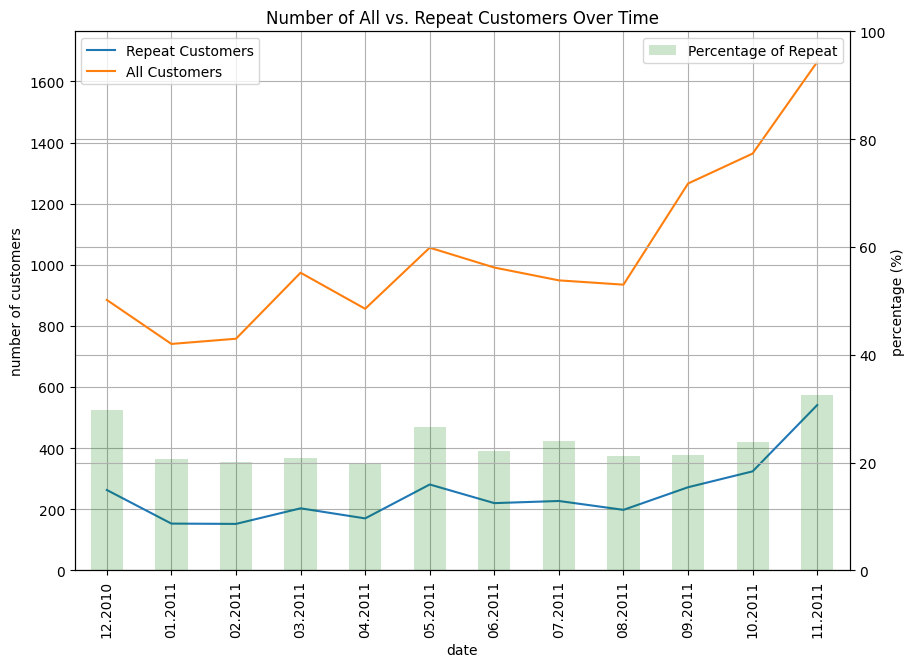

In [63]:
ax = pd.DataFrame(monthly_repeat_customers_df.values).plot(
    figsize=(10,7)
)

pd.DataFrame(monthly_unique_customers_df.values).plot(
    ax=ax,
    grid=True
)


ax2 = pd.DataFrame(monthly_repeat_percentage.values).plot.bar(
    ax=ax,
    grid=True,
    secondary_y=True,
    color='green',
    alpha=0.2
)

ax.set_xlabel('date')
ax.set_ylabel('number of customers')
ax.set_title('Number of All vs. Repeat Customers Over Time')

ax2.set_ylabel('percentage (%)')

ax.legend(['Repeat Customers', 'All Customers'])
ax2.legend(['Percentage of Repeat'], loc='upper right')

ax.set_ylim([0, monthly_unique_customers_df.values.max()+100])
ax2.set_ylim([0, 100])

plt.xticks(
    range(len(monthly_repeat_customers_df.index)),
    [x.strftime('%m.%Y') for x in monthly_repeat_customers_df.index],
    rotation=90, ha='right'
)

plt.show()

#### - Revenue from Repeat Customers

In [64]:
monthly_rev_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID'
]).filter(lambda x: len(x) > 1).resample('M')['Sales'].sum()

C:\Users\navee\AppData\Local\Temp\ipykernel_11808\1917409801.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.Grouper(freq='M'), 'CustomerID'
C:\Users\navee\AppData\Local\Temp\ipykernel_11808\1917409801.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ]).filter(lambda x: len(x) > 1).resample('M')['Sales'].sum()


In [65]:
monthly_rev_repeat_customers_df

InvoiceDate
2010-12-31    359170.60
2011-01-31    222124.00
2011-02-28    191067.27
2011-03-31    267390.48
2011-04-30    195474.18
2011-05-31    378197.04
2011-06-30    376307.26
2011-07-31    317475.00
2011-08-31    317134.25
2011-09-30    500663.36
2011-10-31    574006.87
2011-11-30    713775.85
Freq: ME, Name: Sales, dtype: float64

In [66]:
monthly_revenue_df = df.set_index('InvoiceDate')['Sales'].resample('M').sum()

C:\Users\navee\AppData\Local\Temp\ipykernel_11808\1432129709.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue_df = df.set_index('InvoiceDate')['Sales'].resample('M').sum()


In [67]:
monthly_rev_perc_repeat_customers_df = (monthly_rev_repeat_customers_df/monthly_revenue_df )* 100.0

In [68]:
monthly_rev_perc_repeat_customers_df

InvoiceDate
2010-12-31    43.602098
2011-01-31    32.128346
2011-02-28    36.488853
2011-03-31    37.259729
2011-04-30    36.346420
2011-05-31    49.082331
2011-06-30    49.401017
2011-07-31    44.141497
2011-08-31    41.775552
2011-09-30    47.295296
2011-10-31    49.698455
2011-11-30    47.285696
Freq: ME, Name: Sales, dtype: float64

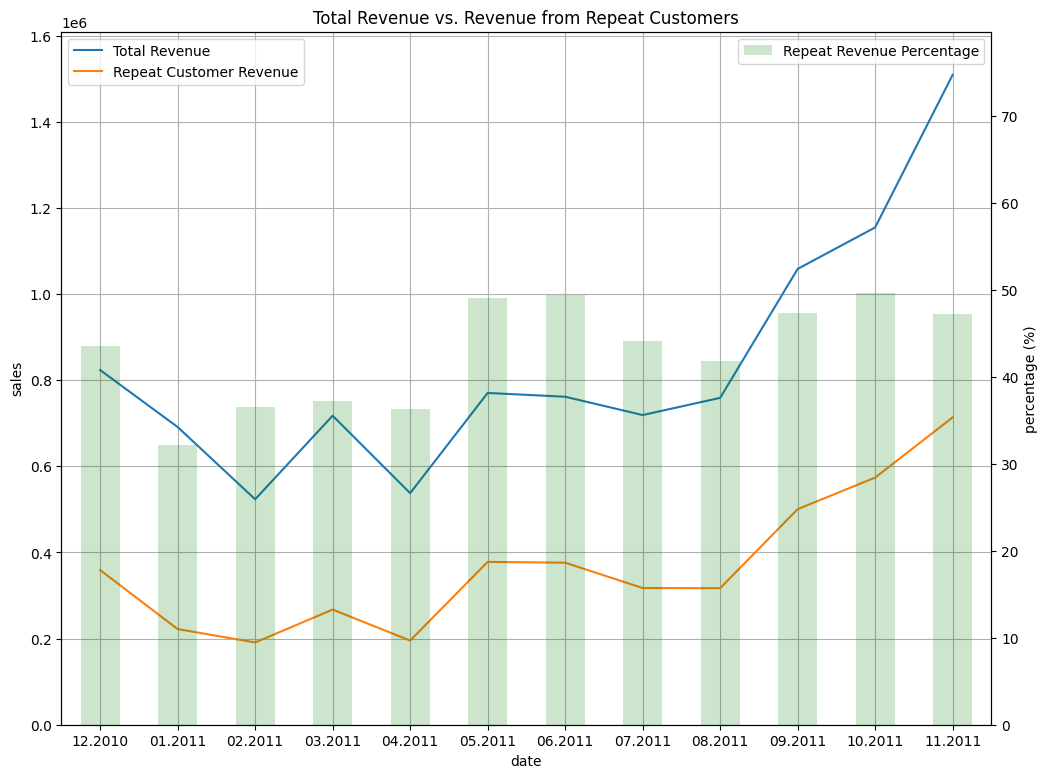

In [69]:
ax = pd.DataFrame(monthly_revenue_df.values).plot(figsize=(12,9))

pd.DataFrame(monthly_rev_repeat_customers_df.values).plot(
    ax=ax,
    grid=True,
)

ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue vs. Revenue from Repeat Customers')

ax.legend(['Total Revenue', 'Repeat Customer Revenue'])

ax.set_ylim([0, max(monthly_revenue_df.values)+100000])

ax2 = ax.twinx()

pd.DataFrame(monthly_rev_perc_repeat_customers_df.values).plot(
    ax=ax2,
    kind='bar',
    color='g',
    alpha=0.2
)

ax2.set_ylim([0, max(monthly_rev_perc_repeat_customers_df.values)+30])
ax2.set_ylabel('percentage (%)')
ax2.legend(['Repeat Revenue Percentage'])

ax2.set_xticklabels([
    x.strftime('%m.%Y') for x in monthly_rev_perc_repeat_customers_df.index],
    rotation=45
)

plt.show()

#### - Popular Items Over Time

In [75]:
date_item_df = pd.DataFrame(
    df.set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Quantity'].sum()
)
date_item_df

C:\Users\navee\AppData\Local\Temp\ipykernel_11808\3164953202.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.Grouper(freq='M'), 'StockCode'


Quantity
InvoiceDate StockCode          
2010-12-31  10002           251
            10120            16
            10125           154
            10133           130
            10135           411
...                         ...
2011-11-30  C2               23
            DCGSSGIRL         1
            DOT              47
            M              3891
            POST            462

[31599 rows x 1 columns]

In [76]:
# Rank items by the last month sales
last_month_sorted_df = date_item_df.loc['2011-11-30'].sort_values(
    by='Quantity', ascending=False
)

 # DataFrame showing sorted results for the latest month
last_month_sorted_df

,Quantity
StockCode,
23084,14954
22197,12460
22086,7908
85099B,5909
22578,5366
...,...
35638A,1
35638B,1
35818B,1


In [77]:
all_month_sorted_df = date_item_df.sort_values(
    by='Quantity', ascending=False
).reset_index()

all_month_sorted_df.head(10)

,InvoiceDate,StockCode,Quantity
0,2011-01-31,23166,74215
1,2011-11-30,23084,14954
2,2011-11-30,22197,12460
3,2011-04-30,84077,10239
4,2011-10-31,84077,8180
5,2011-11-30,22086,7908
6,2011-05-31,22197,6849
7,2011-08-31,84879,6553
8,2011-10-31,23084,6323
9,2011-11-30,85099B,5909


In [ ]:
# Rank items by the last month sales


# Sort rows by highest Quantity and reset the index


In [80]:
# Regroup for top 5 items
date_item_df = pd.DataFrame(
    df.loc[
        df['StockCode'].isin([23166, 23084, 22197, 84077, 22086])
    ]
    .set_index('InvoiceDate')
    .groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Quantity']
    .sum().reset_index()
    
    # Sum quantity for each month–StockCode combination
)
date_item_df

C:\Users\navee\AppData\Local\Temp\ipykernel_11808\3807244283.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.Grouper(freq='M'), 'StockCode'


,InvoiceDate,StockCode,Quantity
0,2010-12-31,22086,2460
1,2010-12-31,22197,2738
2,2010-12-31,84077,5195
3,2011-01-31,22086,24
4,2011-01-31,22197,1824
5,2011-01-31,23166,74215
6,2011-01-31,84077,1492
7,2011-02-28,22086,5
8,2011-02-28,22197,2666
9,2011-02-28,84077,3518


In [81]:
trending_itmes_df = date_item_df.reset_index().pivot(index='InvoiceDate', columns='StockCode', values='Quantity').fillna(0)


# Set InvoiceDate as the new index for time-series analysis
# Remove the upper level of the column MultiIndex created during pivot

trending_itmes_df

StockCode,22086,22197,23084,23166,84077
InvoiceDate,,,,,
2010-12-31,2460.0,2738.0,0.0,0.0,5195.0
2011-01-31,24.0,1824.0,0.0,74215.0,1492.0
2011-02-28,5.0,2666.0,0.0,0.0,3518.0
2011-03-31,87.0,2803.0,0.0,0.0,3888.0
2011-04-30,13.0,1869.0,0.0,0.0,10239.0
2011-05-31,17.0,6849.0,1131.0,801.0,4949.0
2011-06-30,344.0,2095.0,1713.0,397.0,2122.0
2011-07-31,383.0,1876.0,294.0,731.0,3762.0
2011-08-31,490.0,5421.0,1847.0,427.0,2261.0


In [ ]:
df1=date_item_df.reset_index().pivot('InvoiceDate','StockCode').fillna(0)
# Reset index again to flatten the DataFrame structure
df1=df1.set_index('InvoiceDate')
# Remove the first level of the MultiIndex created by pivot
# Display the final DataFrame




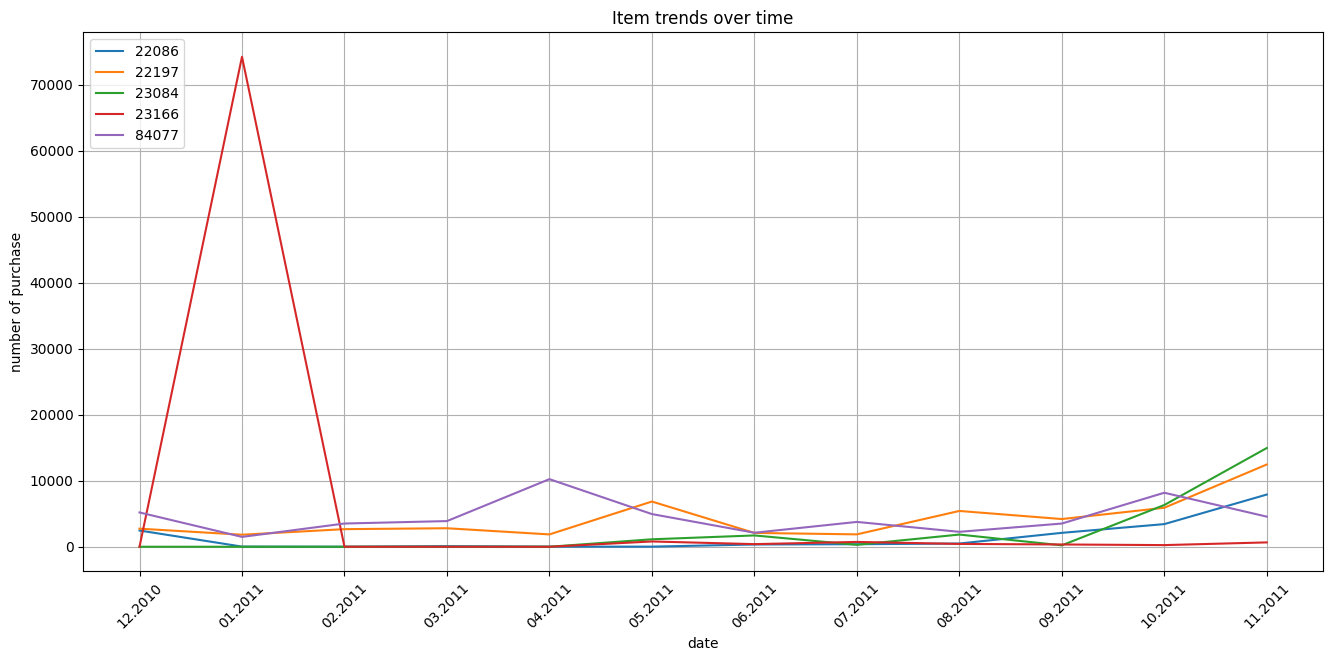

In [88]:
ax = pd.DataFrame(trending_itmes_df.values).plot(
    figsize=(16,7),
    grid=True
)

ax.set_ylabel('number of purchase')
ax.set_xlabel('date')
ax.set_title('Item trends over time')

ax.legend(trending_itmes_df.columns, loc='upper left')

plt.xticks(
    range(len(trending_itmes_df.index)),
    [x.strftime('%m.%Y') for x in trending_itmes_df.index],
    rotation=45
)
#Display the plot
plt.show()

#Display the plot

In [ ]:
df.loc[df['StockCode'] == 23084, 'Description']

In [ ]:
# Show unique descriptions for StockCode 22197 drop duplicate

